# Stroke Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
# reading the data
stroke_df=pd.read_csv('healthcare-dataset-stroke-data.csv',index_col=0)
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [3]:
stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [4]:
# undersample for majority class (random sample)
# for minority class: oversampling - we randomly regenerate some existing records
# n = 1000 for 0 and n=1000 for 1, and for 1 will be repeated values

In [5]:
stroke_df.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
25199,Female,80.0,0,0,Yes,Private,Rural,71.88,26.7,never smoked,0


In [6]:
stroke_df_bal=stroke_df.groupby('stroke',group_keys=False).apply(lambda x: x.sample(1000,replace=True,random_state=0))

In [7]:
stroke_df_bal['stroke'].value_counts()

0    1000
1    1000
Name: stroke, dtype: int64

In [8]:
stroke_df_bal.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [9]:
# filling missing values with mean
stroke_df_bal.fillna(value=stroke_df_bal.mean(),inplace=True)
stroke_df_bal

/var/folders/xj/pm39t27j2q9g70lf041mbs5h0000gp/T/ipykernel_66935/1882437825.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stroke_df_bal.fillna(value=stroke_df_bal.mean(),inplace=True)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
69329,Female,62.00,0,0,Yes,Private,Rural,203.57,29.100000,Unknown,0
58833,Male,14.00,0,0,No,Private,Rural,61.04,17.600000,Unknown,0
67942,Male,21.00,0,0,No,Private,Rural,65.09,23.500000,never smoked,0
67411,Male,29.00,0,0,No,Private,Rural,105.73,28.200000,smokes,0
37544,Male,51.00,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4639,Female,69.00,0,0,Yes,Govt_job,Urban,82.81,28.000000,never smoked,1
41081,Male,63.00,0,0,Yes,Private,Rural,137.30,31.700000,formerly smoked,1
18937,Male,79.00,0,0,Yes,Private,Rural,114.77,29.440033,formerly smoked,1


In [10]:
# checking for null values
stroke_df_bal.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [11]:
# creating features and target sets
X_stroke_df_bal,y_stroke_df_bal=stroke_df_bal.iloc[:,:-1],stroke_df_bal['stroke']
# checking work
display(X_stroke_df_bal.head(2))
display(y_stroke_df_bal.head(2))

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
69329,Female,62.0,0,0,Yes,Private,Rural,203.57,29.1,Unknown
58833,Male,14.0,0,0,No,Private,Rural,61.04,17.6,Unknown


id
69329    0
58833    0
Name: stroke, dtype: int64

In [12]:
# converting features from int64 to str
stroke_df_bal['hypertension']=stroke_df_bal['hypertension'].astype(str)
stroke_df_bal['heart_disease']=stroke_df_bal['heart_disease'].astype(str)
stroke_df_bal.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
# encode categorical variables
X,y=stroke_df_bal.iloc[:,:-1],stroke_df_bal.iloc[:,:-1]
X_dummies=pd.get_dummies(X)
X_dummies.head(2)

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
69329,62.0,203.57,29.1,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
58833,14.0,61.04,17.6,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0


In [14]:
# split the data to train and test
X_train, X_test, y_train, y_test=train_test_split(X_dummies,y_stroke_df_bal,
                                                 test_size=.25,
                                                 random_state=0)

## K-NN Classification

In [15]:
# scaling the data
knn_scaler=MinMaxScaler()
X_dummies_trns=knn_scaler.fit_transform(X_dummies)
X_dummies_trns

array([[0.75585938, 0.68511248, 0.3715415 , ..., 0.        , 0.        ,
        0.        ],
       [0.16992188, 0.02674488, 0.14426877, ..., 0.        , 0.        ,
        0.        ],
       [0.25537109, 0.04545245, 0.26086957, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.96337891, 0.27493187, 0.37826152, ..., 1.        , 0.        ,
        0.        ],
       [0.95117188, 0.05561458, 0.2826087 , ..., 0.        , 1.        ,
        0.        ],
       [0.01513672, 0.06984156, 0.37826152, ..., 0.        , 0.        ,
        0.        ]])

In [16]:
# range of values to test for n_neighbors
C_range_knn=[1,5,10,15,20,25,30,35,40,45,50,51,52,60,70]

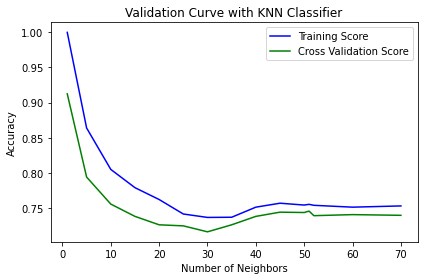

In [17]:
# visualize a validation curve for best n_neighbors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

stroke_df_bal=load_digits()

train_scores_knn1,test_scores_knn1=validation_curve(KNeighborsClassifier(),
                                                    X_dummies_trns,y_stroke_df_bal,
                                                   param_name="n_neighbors",
                                                   param_range=C_range_knn,
                                                   cv=5,scoring="accuracy")
# calculating mean and standard deviation of training score
mean_train_score=np.mean(train_scores_knn1,axis=1)
std_train_score=np.std(train_scores_knn1,axis=1)
# calculating mean and standard deviation of testing score
mean_test_score=np.mean(test_scores_knn1,axis=1)
std_test_score=np.std(test_scores_knn1,axis=1)
# plot mean accuracy scores for training and testing scores
plt.plot(C_range_knn,mean_train_score,
        label="Training Score",color='b')
plt.plot(C_range_knn,mean_test_score,
         label="Cross Validation Score",color='g')
# creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Choose n_neighbors = 35

In [18]:
# determine train & test scores via validation curve
train_scores_knn,test_scores_knn=validation_curve(KNeighborsClassifier(),
                                         X_dummies_trns,y_stroke_df_bal,
                                         param_name='n_neighbors',
                                         param_range=C_range_knn,cv=5,
                                                  scoring='accuracy')

In [19]:
# choose n_neighbors = 35
print('average score in 5 folds for different neighbors:')
print('training:',train_scores_knn.mean(axis=1).round(4))
print('test:',test_scores_knn.mean(axis=1).round(4))

average score in 5 folds for different neighbors:
training: [1.     0.8639 0.8049 0.7789 0.762  0.7414 0.7365 0.7368 0.7511 0.7568
 0.7541 0.7551 0.7537 0.7511 0.7529]
test: [0.9125 0.794  0.7555 0.738  0.726  0.7245 0.716  0.726  0.738  0.744
 0.7435 0.7455 0.739  0.7405 0.7395]


In [20]:
# testing to different models of KNeighborsClassifier to check validation curve
knn1=KNeighborsClassifier(n_neighbors=1)
knn2=KNeighborsClassifier(n_neighbors=2)
knn3=KNeighborsClassifier(n_neighbors=3)
knn4=KNeighborsClassifier(n_neighbors=4)
knn5=KNeighborsClassifier(n_neighbors=5)
knn25=KNeighborsClassifier(n_neighbors=25)
knn29=KNeighborsClassifier(n_neighbors=29)
knn35=KNeighborsClassifier(n_neighbors=35)
knn51=KNeighborsClassifier(n_neighbors=51)
knn55=KNeighborsClassifier(n_neighbors=55)

In [21]:
# fit the model
knn1.fit(X_train,y_train)
knn2.fit(X_train,y_train)
knn3.fit(X_train,y_train)
knn4.fit(X_train,y_train)
knn5.fit(X_train,y_train)
knn25.fit(X_train,y_train)
knn29.fit(X_train,y_train)
knn35.fit(X_train,y_train)
knn51.fit(X_train,y_train)
knn55.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=55)

In [22]:
# evaluate the model
## n_neighbors = 35 was a good choice
print('knn1 acc on train: {:.2%}'.format(knn1.score(X_train,y_train)))
print('knn1 acc on test: {:.2%}'.format(knn1.score(X_test,y_test)),'\n')

print('knn2 acc on train: {:.2%}'.format(knn2.score(X_train,y_train)))
print('knn2 acc on test: {:.2%}'.format(knn2.score(X_test,y_test)),'\n')

print('knn3 acc on train: {:.2%}'.format(knn3.score(X_train,y_train)))
print('knn3 acc on test: {:.2%}'.format(knn3.score(X_test,y_test)),'\n')

print('knn4 acc on train: {:.2%}'.format(knn4.score(X_train,y_train)))
print('knn4 acc on test: {:.2%}'.format(knn4.score(X_test,y_test)),'\n')

print('knn5 acc on train: {:.2%}'.format(knn5.score(X_train,y_train)))
print('knn5 acc on test: {:.2%}'.format(knn5.score(X_test,y_test)),'\n')

print('knn25 acc on train: {:.2%}'.format(knn25.score(X_train,y_train)))
print('knn25 acc on test: {:.2%}'.format(knn25.score(X_test,y_test)),'\n')

print('knn29 acc on train: {:.2%}'.format(knn29.score(X_train,y_train)))
print('knn29 acc on test: {:.2%}'.format(knn29.score(X_test,y_test)),'\n')

print('knn35 acc on train: {:.2%}'.format(knn35.score(X_train,y_train)))
print('knn35 acc on test: {:.2%}'.format(knn35.score(X_test,y_test)),'\n')

print('knn51 acc on train: {:.2%}'.format(knn51.score(X_train,y_train)))
print('knn51 acc on test: {:.2%}'.format(knn51.score(X_test,y_test)),'\n')

print('knn55 acc on train: {:.2%}'.format(knn55.score(X_train,y_train)))
print('knn55 acc on test: {:.2%}'.format(knn55.score(X_test,y_test)))

knn1 acc on train: 100.00%
knn1 acc on test: 92.40% 

knn2 acc on train: 98.87%
knn2 acc on test: 88.40% 

knn3 acc on train: 92.40%
knn3 acc on test: 84.80% 

knn4 acc on train: 90.53%
knn4 acc on test: 81.60% 

knn5 acc on train: 86.93%
knn5 acc on test: 80.20% 

knn25 acc on train: 79.40%
knn25 acc on test: 77.80% 

knn29 acc on train: 79.60%
knn29 acc on test: 78.60% 

knn35 acc on train: 78.73%
knn35 acc on test: 81.00% 

knn51 acc on train: 76.33%
knn51 acc on test: 77.40% 

knn55 acc on train: 76.60%
knn55 acc on test: 79.00%


## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
# scale the data
log_scaler=MinMaxScaler()
X_dummies_trns

array([[0.75585938, 0.68511248, 0.3715415 , ..., 0.        , 0.        ,
        0.        ],
       [0.16992188, 0.02674488, 0.14426877, ..., 0.        , 0.        ,
        0.        ],
       [0.25537109, 0.04545245, 0.26086957, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.96337891, 0.27493187, 0.37826152, ..., 1.        , 0.        ,
        0.        ],
       [0.95117188, 0.05561458, 0.2826087 , ..., 0.        , 1.        ,
        0.        ],
       [0.01513672, 0.06984156, 0.37826152, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
# range for validation curve to test for best logistic regression value of 'C'
C_range_log=[0.01,0.1,0.5,1,2,3,4,5,8,9,10,15,32,33,34,35]

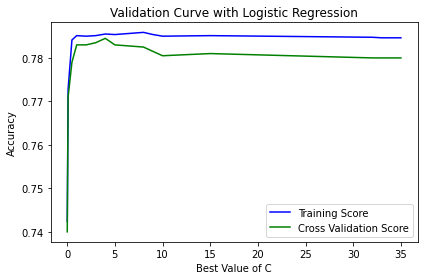

In [26]:
# visualize the validation curve
train_scores_log,test_scores_log=validation_curve(LogisticRegression(max_iter=1000),
                                                    X_dummies_trns,y_stroke_df_bal,
                                                   param_name='C',
                                                   param_range=C_range_log,
                                                   cv=5,scoring="accuracy")
# calculating mean and standard deviation of training score
mean_train_score_log=np.mean(train_scores_log,axis=1)
std_train_score_log=np.std(train_scores_log,axis=1)
# calculating mean and standard deviation of testing score
mean_test_score_log=np.mean(test_scores_log,axis=1)
std_test_score_log=np.std(test_scores_log,axis=1)
# plot mean accuracy scores for training and testing scores
plt.plot(C_range_log,mean_train_score_log,
        label="Training Score",color='b')
plt.plot(C_range_log,mean_test_score_log,
         label="Cross Validation Score",color='g')
# creating the plot
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Best Value of C")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Choose C=4

In [27]:
# determine train & test scores via validation curve
train_scores,test_scores=validation_curve(LogisticRegression(max_iter=1000),
                                          X_dummies_trns,y_stroke_df_bal,
                                          param_name='C',param_range=C_range_log,cv=5)

In [28]:
train_scores.round(4)

array([[0.7419, 0.7312, 0.7381, 0.7519, 0.7488],
       [0.7725, 0.7731, 0.7656, 0.775 , 0.7781],
       [0.7812, 0.7844, 0.7769, 0.7875, 0.7906],
       [0.7819, 0.7862, 0.78  , 0.7894, 0.7881],
       [0.7812, 0.7844, 0.7756, 0.7931, 0.7906],
       [0.7819, 0.7825, 0.7762, 0.7931, 0.7919],
       [0.7819, 0.7825, 0.7788, 0.7931, 0.7912],
       [0.7819, 0.7825, 0.7781, 0.7931, 0.7912],
       [0.7837, 0.7819, 0.7781, 0.7938, 0.7919],
       [0.7806, 0.7819, 0.7781, 0.7944, 0.7919],
       [0.7806, 0.7819, 0.7762, 0.7944, 0.7919],
       [0.78  , 0.7825, 0.7762, 0.7944, 0.7925],
       [0.78  , 0.7819, 0.7756, 0.7938, 0.7925],
       [0.78  , 0.7819, 0.7756, 0.7931, 0.7925],
       [0.78  , 0.7819, 0.7756, 0.7931, 0.7925],
       [0.78  , 0.7819, 0.7756, 0.7931, 0.7925]])

In [29]:
test_scores.round(4)

array([[0.7475, 0.7175, 0.7625, 0.74  , 0.7325],
       [0.76  , 0.7675, 0.8   , 0.7675, 0.76  ],
       [0.775 , 0.7625, 0.815 , 0.7725, 0.77  ],
       [0.7725, 0.77  , 0.8225, 0.78  , 0.77  ],
       [0.77  , 0.77  , 0.8225, 0.7775, 0.775 ],
       [0.77  , 0.7725, 0.8225, 0.7775, 0.775 ],
       [0.77  , 0.7725, 0.825 , 0.7775, 0.7775],
       [0.77  , 0.7675, 0.825 , 0.775 , 0.7775],
       [0.77  , 0.7675, 0.825 , 0.7725, 0.7775],
       [0.765 , 0.7675, 0.825 , 0.7725, 0.7775],
       [0.765 , 0.7675, 0.82  , 0.7725, 0.7775],
       [0.7675, 0.77  , 0.82  , 0.7725, 0.775 ],
       [0.7675, 0.7675, 0.8175, 0.7725, 0.775 ],
       [0.7675, 0.7675, 0.8175, 0.7725, 0.775 ],
       [0.7675, 0.7675, 0.8175, 0.7725, 0.775 ],
       [0.7675, 0.7675, 0.8175, 0.7725, 0.775 ]])

In [30]:
# C=4 has highest test score
print('average score in 5 folds for different C values:')
print('training:',train_scores.mean(axis=1).round(4))
print('test:',test_scores.mean(axis=1).round(4))

average score in 5 folds for different C values:
training: [0.7424 0.7729 0.7841 0.7851 0.785  0.7851 0.7855 0.7854 0.7859 0.7854
 0.785  0.7851 0.7848 0.7846 0.7846 0.7846]
test: [0.74   0.771  0.779  0.783  0.783  0.7835 0.7845 0.783  0.7825 0.7815
 0.7805 0.781  0.78   0.78   0.78   0.78  ]


In [31]:
train_scores.mean()

0.7815937500000001

In [32]:
test_scores.mean()

0.77828125

In [33]:
# running the logistic regression model
log_reg2=LogisticRegression(C=4,max_iter=1000)
log_reg2.fit(X_train,y_train)

LogisticRegression(C=4, max_iter=1000)

In [34]:
# evaluating the model
print('Log reg acc on train: {:.3f}'.format(log_reg2.score(X_train,y_train)))
print('Log reg acc on test: {:.3f}'.format(log_reg2.score(X_test,y_test)))

Log reg acc on train: 0.776
Log reg acc on test: 0.804


## Support Vector Machine

In [35]:
from sklearn.svm import LinearSVC

In [36]:
# range of C for SVM model validation curve to identify best 'C' value
C_range_svm=[0.5,1,2,3,4,5,6,7,8,9,10]

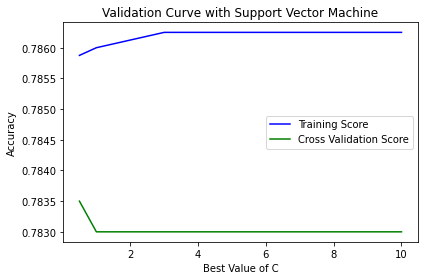

In [37]:
# visualize the validation curve
train_scores_svm_plt,test_scores_svm_plt=validation_curve(LinearSVC(max_iter=10000),
                                                    X_dummies_trns,y_stroke_df_bal,
                                                   param_name='C',
                                                   param_range=C_range_svm,
                                                   cv=5,scoring="accuracy")
# calculating mean and standard deviation of training score
mean_train_score_svm_plt=np.mean(train_scores_svm_plt,axis=1)
std_train_score_svm_plt=np.std(train_scores_svm_plt,axis=1)
# calculating mean and standard deviation of testing score
mean_test_score_svm_plt=np.mean(test_scores_svm_plt,axis=1)
std_test_score_svm_plt=np.std(test_scores_svm_plt,axis=1)
# plot mean accuracy scores for training and testing scores
plt.plot(C_range_svm,mean_train_score_svm_plt,
        label="Training Score",color='b')
plt.plot(C_range_svm,mean_test_score_svm_plt,
         label="Cross Validation Score",color='g')
# creating the plot
plt.title("Validation Curve with Support Vector Machine")
plt.xlabel("Best Value of C")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Choose c=3?

In [38]:
# determine train & test scores via validation curve
train_scores_svc,test_scores_svc=validation_curve(LinearSVC(max_iter=100000),
                                         X_dummies_trns,y_stroke_df_bal,
                                         param_name='C',
                                         param_range=C_range_svm,
                                          cv=5)

In [39]:
train_scores_svc.round(4)

array([[0.7831, 0.7862, 0.775 , 0.7938, 0.7912],
       [0.785 , 0.7862, 0.7738, 0.7931, 0.7919],
       [0.7856, 0.7862, 0.775 , 0.7931, 0.7906],
       [0.7856, 0.7862, 0.775 , 0.7938, 0.7906],
       [0.7856, 0.7862, 0.775 , 0.7938, 0.7906],
       [0.7856, 0.7862, 0.775 , 0.7938, 0.7906],
       [0.7856, 0.7862, 0.775 , 0.7938, 0.7906],
       [0.7856, 0.7862, 0.775 , 0.7938, 0.7906],
       [0.7856, 0.7862, 0.775 , 0.7938, 0.7906],
       [0.7856, 0.7862, 0.775 , 0.7938, 0.7906],
       [0.7856, 0.7862, 0.775 , 0.7938, 0.7906]])

In [40]:
test_scores_svc.round(4)

array([[0.775 , 0.78  , 0.82  , 0.7775, 0.765 ],
       [0.7725, 0.78  , 0.82  , 0.7775, 0.765 ],
       [0.7725, 0.78  , 0.82  , 0.7775, 0.765 ],
       [0.7725, 0.78  , 0.82  , 0.7775, 0.765 ],
       [0.7725, 0.78  , 0.82  , 0.7775, 0.765 ],
       [0.7725, 0.78  , 0.82  , 0.7775, 0.765 ],
       [0.7725, 0.78  , 0.82  , 0.7775, 0.765 ],
       [0.7725, 0.78  , 0.82  , 0.7775, 0.765 ],
       [0.7725, 0.78  , 0.82  , 0.7775, 0.765 ],
       [0.7725, 0.78  , 0.82  , 0.7775, 0.765 ],
       [0.7725, 0.78  , 0.82  , 0.7775, 0.765 ]])

In [41]:
# c=3 is best
print('average score in 5 folds for different C values:')
print('training:',train_scores_svc.mean(axis=1).round(4))
print('test:',train_scores_svc.mean(axis=1).round(4))

average score in 5 folds for different C values:
training: [0.7859 0.786  0.7861 0.7862 0.7862 0.7862 0.7862 0.7862 0.7862 0.7862
 0.7862]
test: [0.7859 0.786  0.7861 0.7862 0.7862 0.7862 0.7862 0.7862 0.7862 0.7862
 0.7862]


In [42]:
train_scores_svc.mean()

0.786181818181818

In [43]:
# run the model
svm=LinearSVC(random_state=0,max_iter=10000,C=3)
svm.fit(X_train,y_train)
print('svm acc on train: {:.2%}'.format(svm.score(X_train,y_train)))
print('svm acc on test: {:.2%}'.format(svm.score(X_test,y_test)))

svm acc on train: 50.67%
svm acc on test: 51.00%


/Users/jdragu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [44]:
X_dummies.columns.values

array(['age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male',
       'gender_Other', 'hypertension_0', 'hypertension_1',
       'heart_disease_0', 'heart_disease_1', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

## Decision Tree

In [45]:
# split the data to train and test
train_scores_dt_leaf, test_scores_dt_leaf=validation_curve(DecisionTreeClassifier(random_state=0,max_depth=15,min_samples_split=6), X_train, y_train, param_name='max_leaf_nodes',
                                           param_range=[103,104,105,106,107,110,115,120,125], cv=5)

In [46]:
# choose max_leaf_nodes=107?
print(train_scores_dt_leaf.mean(axis=1))
print(test_scores_dt_leaf.mean(axis=1))

[0.965      0.9655     0.966      0.96666667 0.96666667 0.96816667
 0.97066667 0.9725     0.974     ]
[0.87733333 0.87866667 0.87866667 0.87733333 0.87666667 0.876
 0.87333333 0.87533333 0.876     ]


In [47]:
# split the data to train and test
train_scores_dt_depth, test_scores_dt_depth=validation_curve(DecisionTreeClassifier(random_state=0), X_train, y_train, param_name='max_depth',
                                           param_range=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,25,30], cv=5)

In [48]:
# range of max_depth for validation curve
max_depth_range=[5,10,15,20,25,30]

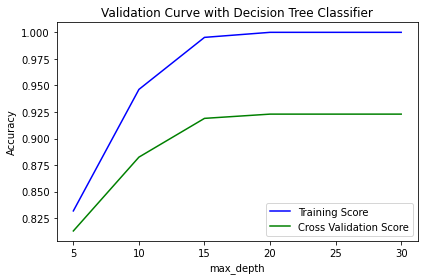

In [49]:
# vizualize the validation curve for max_depth
train_scores_dt,test_scores_dt=validation_curve(DecisionTreeClassifier(random_state=0),
                                                    X_dummies_trns,y_stroke_df_bal,
                                                   param_name='max_depth',
                                                   param_range=max_depth_range,
                                                   cv=5,scoring="accuracy")
# calculating mean and standard deviation of training score
mean_train_score_dt=np.mean(train_scores_dt,axis=1)
std_train_score_dt=np.std(train_scores_dt,axis=1)
# calculating mean and standard deviation of testing score
mean_test_score_dt=np.mean(test_scores_dt,axis=1)
std_test_score_dt=np.std(test_scores_dt,axis=1)
# plot mean accuracy scores for training and testing scores
plt.plot(max_depth_range,mean_train_score_dt,
        label="Training Score",color='b')
plt.plot(max_depth_range,mean_test_score_dt,
         label="Cross Validation Score",color='g')
# creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

choose max_depth 15

In [50]:
# range of max_leaf_nodes for validation curve
max_leaf_nodes_range=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

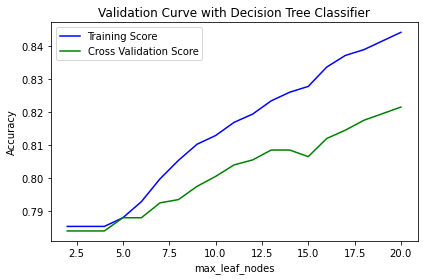

In [51]:
# visualize the validation curve looking at max_leaf_nodes
train_scores_dt,test_scores_dt=validation_curve(DecisionTreeClassifier(random_state=0),
                                                    X_dummies_trns,y_stroke_df_bal,
                                                   param_name='max_leaf_nodes',
                                                   param_range=max_leaf_nodes_range,
                                                   cv=5,scoring="accuracy")
# calculating mean and standard deviation of training score
mean_train_score_dt=np.mean(train_scores_dt,axis=1)
std_train_score_dt=np.std(train_scores_dt,axis=1)
# calculating mean and standard deviation of testing score
mean_test_score_dt=np.mean(test_scores_dt,axis=1)
std_test_score_dt=np.std(test_scores_dt,axis=1)
# plot mean accuracy scores for training and testing scores
plt.plot(max_leaf_nodes_range,mean_train_score_dt,
        label="Training Score",color='b')
plt.plot(max_leaf_nodes_range,mean_test_score_dt,
         label="Cross Validation Score",color='g')
# creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("max_leaf_nodes")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

choose max_leaf_nodes=13

In [52]:
# range of min_samples_split for validation curve
min_split_range=[2,4,6,8,10,12]

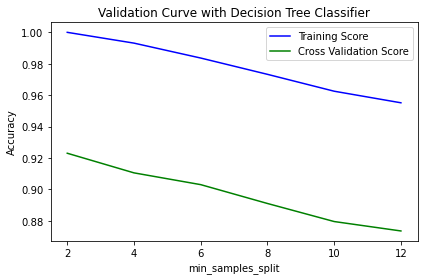

In [53]:
# visualize the validation curve for min_samples_split
train_scores_dt,test_scores_dt=validation_curve(DecisionTreeClassifier(random_state=0),
                                                    X_dummies_trns,y_stroke_df_bal,
                                                   param_name='min_samples_split',
                                                   param_range=min_split_range,
                                                   cv=5,scoring="accuracy")
# calculating mean and standard deviation of training score
mean_train_score_dt=np.mean(train_scores_dt,axis=1)
std_train_score_dt=np.std(train_scores_dt,axis=1)
# calculating mean and standard deviation of testing score
mean_test_score_dt=np.mean(test_scores_dt,axis=1)
std_test_score_dt=np.std(test_scores_dt,axis=1)
# plot mean accuracy scores for training and testing scores
plt.plot(min_split_range,mean_train_score_dt,
        label="Training Score",color='b')
plt.plot(min_split_range,mean_test_score_dt,
         label="Cross Validation Score",color='g')
# creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

dificult to tell, but choose min_samples_split=6

In [54]:
# choose max_depth=15
print(train_scores_dt_depth.mean(axis=1))
print(test_scores_dt_depth.mean(axis=1))

[0.78133333 0.78133333 0.78666667 0.808      0.83183333 0.86033333
 0.88233333 0.90333333 0.922      0.94233333 0.95983333 0.975
 0.98616667 0.99333333 0.99683333 0.9985     1.         1.
 1.        ]
[0.78133333 0.78133333 0.78466667 0.794      0.79266667 0.82066667
 0.83       0.83533333 0.84466667 0.85866667 0.856      0.872
 0.88       0.884      0.89066667 0.88733333 0.888      0.888
 0.888     ]


In [55]:
# validation curve to find actual value of train & test scores (min_samples_split)
train_scores_dt_split, test_scores_dt_split=validation_curve(DecisionTreeClassifier(random_state=0,max_depth=15), X_train, y_train, param_name='min_samples_split',
                                           param_range=[1,2,3,4,5,6,7,8,9,10,12,14,16,18,20], cv=5)

In [56]:
# evaluate the test scores
## choose min_samples_split=6
print(train_scores_dt_split.mean(axis=1))
print(test_scores_dt_split.mean(axis=1))

[       nan 0.99683333 0.99416667 0.9895     0.98383333 0.97633333
 0.9675     0.961      0.95533333 0.95083333 0.94066667 0.9325
 0.9215     0.91633333 0.911     ]
[       nan 0.89066667 0.88733333 0.88466667 0.882      0.87466667
 0.87266667 0.866      0.866      0.864      0.862      0.85866667
 0.84866667 0.848      0.84666667]


In [57]:
# validation curve to find actual value of train & test scores (max_leaf_nodes)
train_scores_dt,test_scores_dt=validation_curve(DecisionTreeClassifier(),
                                         X_train,y_train,
                                         param_name='max_leaf_nodes',
                                         param_range=max_leaf_nodes_range,
                                          cv=5)

In [58]:
# evaluate the test scores
## choose max_leaf_nodes = 13
print('average score in 5 folds for different max_leaf_nodes values:')
print('training:',train_scores_dt.mean(axis=1).round(4))
print('test:',test_scores_dt.mean(axis=1).round(4))

average score in 5 folds for different max_leaf_nodes values:
training: [   nan 0.7813 0.7813 0.7813 0.7855 0.7918 0.7975 0.8023 0.8062 0.8135
 0.8163 0.8208 0.8228 0.825  0.8285 0.8308 0.8338 0.8368 0.8398 0.843 ]
test: [   nan 0.7813 0.7813 0.7813 0.784  0.784  0.786  0.7873 0.7887 0.794
 0.7927 0.8    0.8    0.8027 0.8013 0.8013 0.8053 0.806  0.81   0.8147]


In [59]:
# fit a decision tree with max_leaf_nodes 13
dt=DecisionTreeClassifier(random_state=0,max_depth=15,max_leaf_nodes=13,min_samples_split=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=13, min_samples_split=6,
                       random_state=0)

In [60]:
# evaluate the performance
print('dt acc on train: {:.3f}'.format(dt.score(X_train, y_train)))
print('dt acc on test: {:.3f}'.format(dt.score(X_test, y_test)))

dt acc on train: 0.830
dt acc on test: 0.832


In [61]:
# evaluate feature importance
feat_imp=pd.DataFrame(data=dt.feature_importances_,index=X_dummies.columns, columns=['importance'])
feat_imp.sort_values(by=['importance'], ascending=False)

,importance
age,0.789672
avg_glucose_level,0.060657
bmi,0.042340
work_type_Govt_job,0.035374
gender_Male,0.024342
ever_married_No,0.024259
smoking_status_never smoked,0.023357
work_type_Private,0.000000
smoking_status_formerly smoked,0.000000
smoking_status_Unknown,0.000000


In [62]:
# export the decision tree to visualize in http://webgraphviz.com/
from sklearn.tree import export_graphviz
export_graphviz(dt,out_file='dt_viz.dot',
               feature_names=X_dummies.columns,
               class_names=dt.classes_.astype(str),
               filled=True)

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
# split the data to train and test
train_scores_rf, test_scores_rf=validation_curve(RandomForestClassifier(), X_train, y_train, param_name='n_estimators',
                                           param_range=[20,30,40,45,50,55,59,60,61,65,70], cv=5)

In [65]:
# range of n_estimators values for random forest validation curve
rf_range=[1,15,50,51,52,53,54,55]

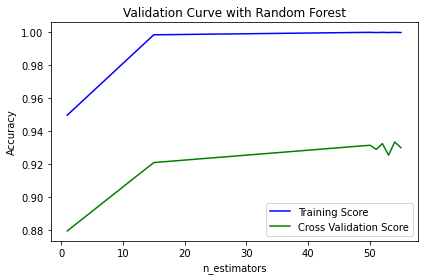

In [66]:
# visualize the validation curve for n_estimators
train_scores_rf,test_scores_rf=validation_curve(RandomForestClassifier(),
                                                    X_dummies_trns,y_stroke_df_bal,
                                                   param_name='n_estimators',
                                                   param_range=rf_range,
                                                   cv=5,scoring="accuracy")
# calculating mean and standard deviation of training score
mean_train_score_rf=np.mean(train_scores_rf,axis=1)
std_train_score_rf=np.std(train_scores_rf,axis=1)
# calculating mean and standard deviation of testing score
mean_test_score_rf=np.mean(test_scores_rf,axis=1)
std_test_score_rf=np.std(test_scores_rf,axis=1)
# plot mean accuracy scores for training and testing scores
plt.plot(rf_range,mean_train_score_rf,
        label="Training Score",color='b')
plt.plot(rf_range,mean_test_score_rf,
         label="Cross Validation Score",color='g')
# creating the plot
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

choose n_estimators = 52

In [67]:
# run validation curve to see train & test scores
train_scores_rf,test_scores_rf=validation_curve(RandomForestClassifier(),
                                                    X_dummies_trns,y_stroke_df_bal,
                                                   param_name='n_estimators',
                                                   param_range=rf_range,
                                                   cv=5,scoring="accuracy")

In [68]:
# evaluate the validation curve scores
## choose n_estimators = 42
print(train_scores_rf.mean(axis=1))
print(test_scores_rf.mean(axis=1))

[0.949625 0.99875  1.       1.       0.99975  1.       1.       0.999875]
[0.8695 0.924  0.933  0.929  0.931  0.927  0.9325 0.926 ]


In [69]:
# define and fit the model
rf=RandomForestClassifier(n_estimators=52,criterion='gini',random_state=0,)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=52, random_state=0)

In [71]:
# evaluate the performance
print('rf on train: {:.2%}'.format(rf.score(X_train, y_train)))
print('rf on test: {:.2%}'.format(rf.score(X_test, y_test)))

rf on train: 100.00%
rf on test: 96.20%


## Best Model: Random Forest

## Run predictions with Random Forest

In [72]:
# get sample of data to reference columns
X_dummies.sample()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
16245,51.0,211.83,56.6,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


### Prediction 1

In [98]:
# Choose a data point to compare for prediction
## choose index 48588
X_dummies.loc[48588]

age                                59.00
avg_glucose_level                 109.82
bmi                                23.70
gender_Female                       1.00
gender_Male                         0.00
gender_Other                        0.00
hypertension_0                      1.00
hypertension_1                      0.00
heart_disease_0                     1.00
heart_disease_1                     0.00
ever_married_No                     0.00
ever_married_Yes                    1.00
work_type_Govt_job                  0.00
work_type_Never_worked              0.00
work_type_Private                   1.00
work_type_Self-employed             0.00
work_type_children                  0.00
Residence_type_Rural                0.00
Residence_type_Urban                1.00
smoking_status_Unknown              0.00
smoking_status_formerly smoked      0.00
smoking_status_never smoked         1.00
smoking_status_smokes               0.00
Name: 48588, dtype: float64

In [93]:
# Check if patient with index 48588 had stroke or not
stroke_df.loc[48588]

gender                     Female
age                          59.0
hypertension                    0
heart_disease                   0
ever_married                  Yes
work_type                 Private
Residence_type              Urban
avg_glucose_level          109.82
bmi                          23.7
smoking_status       never smoked
stroke                          0
Name: 48588, dtype: object

Patient did not have a stroke. Let's see if model predicts the same

In [76]:
# generate prediction based on column values
p1=[59.0,109.82,23.7,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0]

# run prediction
rf.predict([p1])

/Users/jdragu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

Result: no stroke (0), which matches actual patient outcome

### Prediction 2

In [97]:
# Choose a data point to compare for prediction
## choose index 11762
X_dummies.loc[11762]

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
11762,76.0,207.28,34.9,1,0,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
11762,76.0,207.28,34.9,1,0,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0


In [92]:
# check for stroke
stroke_df.loc[11762]

gender                Female
age                     76.0
hypertension               0
heart_disease              0
ever_married             Yes
work_type            Private
Residence_type         Urban
avg_glucose_level     207.28
bmi                     34.9
smoking_status       Unknown
stroke                     1
Name: 11762, dtype: object

Patient 2 had a stroke. Let's see if model will predict accurately

In [80]:
# set predictions to corresponding columns
p2=[76.0,207.28,34.9,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0]

# run prediction, check for model accuracy
rf.predict([p2])

/Users/jdragu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

Result: model predicted a stroke, which is accuracy to patient reality

### Prediction 3

In [96]:
# Choose a data point to compare for prediction
## choose index 67159
X_dummies.loc[67159]

age                               73.00
avg_glucose_level                 71.29
bmi                               37.70
gender_Female                      0.00
gender_Male                        1.00
gender_Other                       0.00
hypertension_0                     0.00
hypertension_1                     1.00
heart_disease_0                    1.00
heart_disease_1                    0.00
ever_married_No                    1.00
ever_married_Yes                   0.00
work_type_Govt_job                 1.00
work_type_Never_worked             0.00
work_type_Private                  0.00
work_type_Self-employed            0.00
work_type_children                 0.00
Residence_type_Rural               0.00
Residence_type_Urban               1.00
smoking_status_Unknown             0.00
smoking_status_formerly smoked     0.00
smoking_status_never smoked        1.00
smoking_status_smokes              0.00
Name: 67159, dtype: float64

In [91]:
# check if had stroke or not
stroke_df.loc[67159]

gender                       Male
age                          73.0
hypertension                    1
heart_disease                   0
ever_married                   No
work_type                Govt_job
Residence_type              Urban
avg_glucose_level           71.29
bmi                          37.7
smoking_status       never smoked
stroke                          0
Name: 67159, dtype: object

Patient with index 67159 did NOT have a stroke. Let's test the model to see if it will predict same outcome

In [86]:
# set predictions to corresponding columns
p3=[73.0,71.29,37.7,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0]

# run prediction
rf.predict([p3])

/Users/jdragu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

Result: model prediction matches patient record

### Prediction 4

In [95]:
X_dummies.loc[56939]

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
56939,55.0,92.98,25.6,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
56939,55.0,92.98,25.6,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
56939,55.0,92.98,25.6,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
56939,55.0,92.98,25.6,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [90]:
# last random patient reference
stroke_df.loc[56939]

gender                      Female
age                           55.0
hypertension                     0
heart_disease                    0
ever_married                   Yes
work_type            Self-employed
Residence_type               Rural
avg_glucose_level            92.98
bmi                           25.6
smoking_status        never smoked
stroke                           1
Name: 56939, dtype: object

Patient with index 56939 did have stroke

In [99]:
# set prediction to column values
p4=[55.0,92.98,25.6,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0]

# run prediction, check accuracy
rf.predict([p4])

/Users/jdragu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

Final result: model once again predicted accurately that patient has stroke